In [44]:
#z = 3 Гипергеометрическое пространство
#p = 3 - три признака
#n = 5 - пять классов

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
dimensions = 3
observations_amount = 1500

In [5]:
import numpy as np
from sklearn.cluster import KMeans

observations_1 = np.random.hypergeometric(60, 20, 40, (observations_amount // 5, dimensions))
observations_2 = np.random.hypergeometric(60, 20, 40, (observations_amount // 5, dimensions)) + 10
observations_3 = np.random.hypergeometric(60, 20, 40, (observations_amount // 5, dimensions)) + 20
observations_4 = np.random.hypergeometric(60, 20, 40, (observations_amount // 5, dimensions)) + 30
observations_5 = np.random.hypergeometric(60, 20, 40, (observations_amount // 5, dimensions)) + 40

In [6]:
observations_1.shape

(300, 3)

In [7]:
observations_1

array([[31, 31, 29],
       [30, 30, 28],
       [30, 29, 27],
       [31, 31, 31],
       [30, 29, 32],
       [31, 29, 27],
       [33, 32, 29],
       [31, 33, 29],
       [30, 31, 27],
       [30, 27, 26],
       [27, 29, 29],
       [35, 29, 29],
       [29, 31, 32],
       [29, 30, 32],
       [33, 32, 28],
       [31, 28, 31],
       [33, 28, 30],
       [30, 31, 30],
       [32, 31, 29],
       [28, 33, 30],
       [30, 29, 28],
       [29, 31, 31],
       [32, 32, 28],
       [30, 28, 31],
       [31, 31, 29],
       [30, 32, 32],
       [30, 28, 26],
       [28, 28, 29],
       [31, 33, 29],
       [31, 30, 28],
       [30, 29, 28],
       [29, 31, 25],
       [30, 30, 32],
       [30, 31, 33],
       [27, 31, 29],
       [30, 32, 32],
       [31, 27, 31],
       [29, 28, 30],
       [30, 28, 32],
       [30, 35, 30],
       [32, 27, 28],
       [34, 32, 29],
       [28, 32, 28],
       [30, 27, 30],
       [29, 29, 28],
       [29, 30, 27],
       [28, 32, 30],
       [31, 3

In [8]:
observations = np.concatenate([observations_1, observations_2, observations_3, observations_4, observations_5], axis=0)
observations.shape

(1500, 3)

In [9]:
from sklearn.preprocessing import minmax_scale, normalize

normalized_observation = minmax_scale(observations, axis=0)

In [10]:
observations = normalized_observation

In [11]:
labels_0 = np.array([0 for i in range(300)]).reshape(300, 1)
labels_1 = np.array([1 for i in range(300)]).reshape(300, 1)
labels_2 = np.array([2 for i in range(300)]).reshape(300, 1)
labels_3 = np.array([3 for i in range(300)]).reshape(300, 1)
labels_4 = np.array([4 for i in range(300)]).reshape(300, 1)

labels = np.concatenate([labels_0, labels_1, labels_2, labels_3, labels_4], axis=0)

In [12]:
labels_0.shape

(300, 1)

In [13]:
labels.shape

(1500, 1)

In [14]:
labels

array([[0],
       [0],
       [0],
       ...,
       [4],
       [4],
       [4]], shape=(1500, 1))

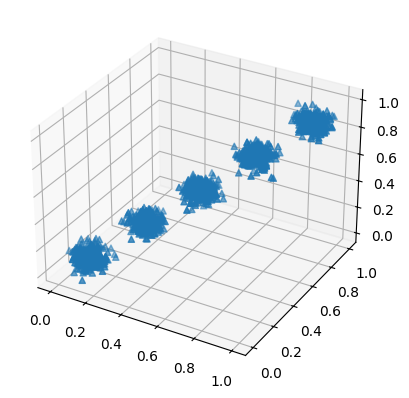

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(observations[:,0] , observations[:,1] , observations [:,2], marker='^')

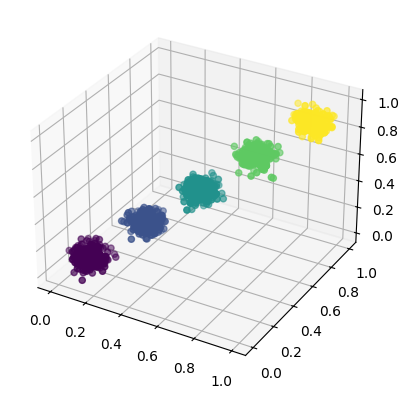

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(observations[:,0], observations[:,1], observations[:,2], marker='o', c=labels)

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

import plotly.express as px
import plotly.io as pio

res_df = pd.DataFrame(observations)
fig = px.scatter_3d(res_df, x=0, y=1, z=2)

pio.renderers.default = "vscode"
fig.show()

In [18]:
fig = px.scatter_3d(res_df, x=0, y=1, z=2, color=labels.reshape(1500,))
fig.show()

In [19]:
fig = px.scatter_3d(observations, x=0, y=1, z=2, color=labels.reshape(1500,))
fig.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(observations, labels.reshape(1500,), test_size=0.2, random_state=42)

**Осуществим кластеризацию методом k-средних**

In [21]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_train)

In [22]:
df_cluster_centers=pd.DataFrame(kmeans.cluster_centers_)
print(df_cluster_centers)

          0         1         2
0  0.703033  0.696496  0.690664
1  0.314143  0.301872  0.312930
2  0.116683  0.104262  0.116488
3  0.507538  0.495219  0.500536
4  0.899551  0.897797  0.879237


In [23]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, kmeans.labels_))

[[  0   0 244   0   0]
 [  0 235   0   0   0]
 [  0   0   0 251   0]
 [234   0   0   0   0]
 [  0   0   0   0 236]]


In [24]:
print(confusion_matrix(y_test, kmeans.predict(X_test)))

[[ 0  0 56  0  0]
 [ 0 65  0  0  0]
 [ 0  0  0 49  0]
 [66  0  0  0  0]
 [ 0  0  0  0 64]]


In [25]:
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [26]:
import plotly.graph_objects as go
fig = go.Figure(data=[
	go.Scatter3d(
      	x=X_train[0], y=X_train[1], z=X_train[2], mode='markers', marker=dict(size=2, color=kmeans.labels_)
  	),

	go.Scatter3d(
  		x=df_cluster_centers[0],
  		y=df_cluster_centers[1],
  		z=df_cluster_centers[2],
  		mode='markers',
  		marker=dict(size=4,color='red')
	)
])
fig.show()

## Перцептрон

In [27]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, recall_score

In [28]:
class PerceptronMulticlassClassification:
    def __init__(self, learning_rate=0.01, n_labels: int = 5, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.aclivation_func = self._sigmoid
        self.n_labels = n_labels
        self.weights = None
        self.bias = None

    def fit(self, X: pd.DataFrame, y: pd.DataFrame):
        n_samples, n_features = X.shape

        self.weights = np.zeros((n_features, self.n_labels))
        print(self.weights)
        self.bias = 0

        for _ in range(self.n_iters):
            for index, item in X.iterrows():
                linear_output = np.dot(np.array(item), self.weights) + self.bias
                y_predicted = self.aclivation_func(linear_output)

                update = self.lr * (y[index] - y_predicted)
                self.weights += update * item
                self.bias += update
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.aclivation_func(linear_output)
        return y_predicted
    
    def _sigmoid(self, x):
        vectorized_sigmoid = np.vectorize(lambda x: 1 / (1 + np.exp(-x)))
        return vectorized_sigmoid(x)

    def _relu(self, x):
        return np.where(x>=0, x, 0)

    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

In [29]:
class RosenblattPerceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.aclivation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([0 if i == 0 else 1 for i in y])

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.aclivation_func(linear_output)

                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.aclivation_func(linear_output)
        return y_predicted
#функция активации (если результат сумматора >= 0, то результат = 1)
    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

In [30]:
perceptron = RosenblattPerceptron()
perceptron.fit(np.array(X_train), np.array(y_train))

In [31]:
X_test.shape

(300, 3)

In [32]:
y_pred = perceptron.predict(np.array(X_test))
accuracy = accuracy_score(y_pred=y_pred, y_true=[0 if label == 0 else 1 for label in y_test])
print(f'accuracy: {accuracy}')

accuracy: 1.0


In [33]:
w = perceptron.weights
bias = perceptron.bias
x_min, x_max = observations[:, 0].min() - 1, observations[:, 0].max() + 1
y_min, y_max = observations[:, 1].min() - 1, observations[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10),
                     np.linspace(y_min, y_max, 10))
zz = (-w[0] * xx - w[1] * yy - bias) / w[2]

In [34]:
# Создаем 3D график
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=observations[:, 0], y=observations[:, 1], z=observations[:, 2],
    mode='markers',
    marker=dict(size=2, color=np.array([0 if label == 0 else 1 for label in labels])),
    name='Class 0',
))

fig.add_trace(go.Surface(
    x=xx,
    y=yy,
    z=zz,
    colorscale='thermal',
    opacity=0.5,
    name='Decision Boundary'
))

fig.show()

## Сеть Кохонена

In [35]:
class KohonenNet():
    def __init__(self, m=3, n=3, lr=1, sigma=1, max_iter=3000, weights = []):
        self.m = m #количество классов
        self.n = n #количество уровней сети
        self.shape = (m, n)
        self.initial_lr = lr
        self.lr = lr #скорость обучения
        self.sigma = sigma #параметр изменения скорости обучения (она будет снижаться с каждой итерацией)
        self.max_iter = max_iter

        self.weights = weights

#функция нахождения выйгравшего нейрона (нейрона с минимальным расстоянием до точки)
    def _find_bmu(self, x):
        x_stack = np.stack([x]*(self.m*self.n), axis=0) #матрица размером [количество центров кластеров(нейронов), количество признаков] (для каждого веса своя строка признаков(точка))
        distance = np.linalg.norm(x_stack - self.weights, axis=1)#эвклидовы расстояния между точкой выборки и нейронами
        return np.argmin(distance)#возвращаем индекс минимального расстояния (индекс подходящего нейрона)

    def step(self, x):
        x_stack = np.stack([x]*(self.m*self.n), axis=0)#матрица размером [количество весов, количество признаков] (для каждого веса своя строка признаков(точка))
        
        bmu_index = self._find_bmu(x)#передаем в функцию строку признаков (точку) и получаем индекс выйгравшего нейрона (центра кластера)
        self.weights[bmu_index] += self.lr * (x - self.weights[bmu_index])

    #обучение весов
    def fit(self, X, epochs=1, shuffle=True):
        global_iter_counter = 0
        n_samples = X.shape[0]#количество элементов выборки
        total_iterations = np.minimum(epochs * n_samples, self.max_iter)#количество обучения весов в эпохе

        for epoch in range(epochs):#изначально у нас 1 эпоха
            if global_iter_counter > self.max_iter:#не даем проводить больше 3000 эпох
                break

            if shuffle:
                indices = np.random.permutation(n_samples)#создание массива с индексами в разброс
            else:
                indices = np.arange(n_samples)#создание массива с индексами по порядку

            #обучение
            for idx in indices:#проход по выборке с индексами idx
                if global_iter_counter > self.max_iter:
                    break
                input = X[idx]
                #перемещение нейрона(изменение весов победившего нейрона)
                self.step(input)

                global_iter_counter += 1
                self.lr = (1 - (global_iter_counter / total_iterations)) * self.initial_lr#изменение параметра обучения

        self._n_iter_ = global_iter_counter

        return

    def returnChangedWeights(self):
      return self.weights

    def predict(self, X):
        labels = np.array([self._find_bmu(x) for x in X])
        return labels

In [36]:
koh_net = KohonenNet(m=5, n=1, weights=np.zeros((5, 3)))
#[0 if label==0 else 1 for label in np.array(y_train)]
koh_net.fit(np.array(X_train), epochs=5)

In [37]:
y_pred = koh_net.predict(np.array(X_test))

In [38]:
print(confusion_matrix(y_test, y_pred))

[[ 0  0  0  0 56]
 [ 0  0 65  0  0]
 [ 0  0  0 49  0]
 [ 0 66  0  0  0]
 [64  0  0  0  0]]


## PNN

In [39]:
import numpy as np
import math

# Probabilistic Neural Network with 4 layers
class PNN(object):
    def __init__(self):
        self.L2 = []    # Layer 2 that holds the patterns
        print('Empty PNN created.')

    def train(self, X, y, p=2):
        self.n_ = X.shape[1]  # num of features
        self.p_ = p           # num of classes
        
        # Layer 2 (Pattern): Set up empty lists for each class
        for k in range(self.p_):
            self.L2.append([])    # Using Python's basic lists because ndarray cannot append empty arrays
                                  # Also perhaps we might have to input different data types

        # Enter patterns into Layer 2
        for i in range(X.shape[0]):
            self.L2[y[i]].append(X[i])
        
        # self.L2 = np.array(self.L2)    # Change to ndarray for speed (Is this faster?)

        print('PNN with %d classes trained.' % self.p_)

    def crossValidate(self, X, y, sigma=0.5):
        result = self.predict(X, sigma)
        num_correct = sum(result[:, 0] == y)

        print('Cross validation accuracy with sigma %.2f: %.1f%%' % (sigma, num_correct/len(y) * 100))

    def predict(self, X, sigma=0.5):
        m = X.shape[0]
        accL3 = np.zeros((m, self.p_))
        accL4 = np.zeros(m)

        self.sigma_ = sigma    # smoothing parameter, not standard deviation
        self.C1_ = 2 * self.sigma_**2
        C2_ = (math.sqrt(2*math.pi) * self.sigma_) ** (- self.n_)
        
        # Layer 1 (Input): x
        for i in range(m):
            x = X[i]

            # Layer 3 (Averaging): for each class
            self.L3_ = np.zeros(self.p_)
            for k in range(self.p_):
                for ki in range(len(self.L2[k])):
                    self.L3_[k] += self._activation(x, self.L2[k][ki])
                self.L3_[k] /= len(self.L2[k])
                
                # Multiply constant
                self.L3_[k] *= C2_
                accL3[i][k] = self.L3_[k]

            # Layer 4 (Output/Decision): Maxing
            self.L4_ = self.L3_.argmax()
            accL4[i] = self.L4_

        return np.column_stack((accL4, accL3))

    def _activation(self, x, w):
        diff = x - w
        return math.exp( - np.dot(diff, diff) / self.C1_ )


# Normalize to unit length: [0, 1]
# X must be ndarray
def Normalize(X):
    x_max = X.max(axis=0)
    x_min = X.min(axis=0)
    return (X - x_min) / (x_max - x_min)

In [40]:
print(np.unique(y_train))

[0 1 2 3 4]


In [59]:
pnn = PNN()
pnn.train(X=np.array(X_train), y=np.array(y_train), p=5)

Empty PNN created.
PNN with 5 classes trained.


In [60]:
y_pred = pnn.predict(X_test)

In [61]:
y_pred

array([[3.        , 0.06740609, 0.20919413, 0.40275696, 0.50016013,
        0.39390227],
       [4.        , 0.01464576, 0.0709568 , 0.21088935, 0.40778665,
        0.50001953],
       [1.        , 0.38385736, 0.4957234 , 0.40691138, 0.21129686,
        0.06946747],
       ...,
       [4.        , 0.01362575, 0.06706513, 0.20223356, 0.39777469,
        0.49572405],
       [3.        , 0.06716003, 0.20870624, 0.40263922, 0.50148087,
        0.39619502],
       [2.        , 0.21347707, 0.41235891, 0.50128655, 0.3895505 ,
        0.19198777]], shape=(300, 6))

In [71]:
pred_labels = []
for pred_vect in y_pred:
    pred_labels.append(int(pred_vect[0]))

In [72]:
np.unique(np.array(pred_labels))

array([0, 1, 2, 3, 4])

In [73]:
print(confusion_matrix(y_test, pred_labels))

[[56  0  0  0  0]
 [ 0 65  0  0  0]
 [ 0  0 49  0  0]
 [ 0  0  0 66  0]
 [ 0  0  0  0 64]]


## MLP

In [117]:
from random import random
from math import exp

class MLPNetwork:
    def __init__(self, n_inputs, n_hidden, n_outputs):
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs
        self.n_inputs = n_inputs

        self.weights = []

        self.network = list()
        hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
        self.network.append(hidden_layer)
        output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
        self.network.append(output_layer) 

    # Calculate neuron activation for an input
    def activate(self, weights, inputs):
        activation = weights[-1]
        for i in range(len(weights)-1):
            activation += weights[i] * inputs[i]
        return activation
 
    # Transfer neuron activation
    def transfer(self, activation):
        return 1.0 / (1.0 + exp(-activation))
    
    # Forward propagate input to a network output
    def forward_propagate(self, row):
        inputs = row
        for layer in self.network:
            new_inputs = []
            for neuron in layer:
                activation = self.activate(neuron['weights'], inputs)
                neuron['output'] = self.transfer(activation)
                new_inputs.append(neuron['output'])
            inputs = new_inputs
        return inputs
 
    # Calculate the derivative of an neuron output
    def transfer_derivative(self, output):
        return output * (1.0 - output)
 
    # Backpropagate error and store in neurons
    def backward_propagate_error(self, expected):
        for i in reversed(range(len(self.network))):
            layer = self.network[i]
            errors = list()
            if i != len(self.network)-1:
                for j in range(len(layer)):
                    error = 0.0
                    for neuron in self.network[i + 1]:
                        error += (neuron['weights'][j] * neuron['delta'])
                    errors.append(error)
            else:
                for j in range(len(layer)):
                    neuron = layer[j]
                    errors.append(neuron['output'] - expected[j])
            for j in range(len(layer)):
                neuron = layer[j]
                neuron['delta'] = errors[j] * self.transfer_derivative(neuron['output'])
        
    # Update network weights with error
    def update_weights(self, row, l_rate):
        for i in range(len(self.network)):
            inputs = row[:-1]
            if i != 0:
                inputs = [neuron['output'] for neuron in self.network[i - 1]]
            for neuron in self.network[i]:
                for j in range(len(inputs)):
                    neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
                neuron['weights'][-1] -= l_rate * neuron['delta']
 
    # Train a network for a fixed number of epochs
    def fit(self, train, l_rate, n_epoch):
        for epoch in range(n_epoch):
            for row in train:
                outputs = self.forward_propagate(row)
                expected = [0 for i in range(self.n_outputs)]
                expected[int(row[-1])] = 1
                self.backward_propagate_error(expected)
                self.update_weights(row, l_rate)
 
    # Make a prediction with a network
    def predict(self, X):
        predictions = []
        for row in X:
            outputs = self.forward_propagate(row)
            print(outputs)
            predictions.append(outputs.index(max(outputs)))
        return predictions

In [118]:
n_inputs = 3
n_outputs = 5

In [119]:
mlp_net = MLPNetwork(n_inputs=n_inputs, n_outputs=n_outputs, n_hidden=1)
mlp_net.fit(train=X_train, l_rate=0.1, n_epoch=100)

In [120]:
y_pred = mlp_net.predict(X_test)

[0.995437231956894, 0.004542190554366989, 0.004392291389866777, 0.0043213878138311035, 0.004218012394700224]
[0.9955344059157486, 0.00444151517449989, 0.004313541259544311, 0.004229922509500459, 0.004109522168734078]
[0.9949634622576624, 0.0050342595199449084, 0.0047725463339574606, 0.004767163474116631, 0.00475376936171484]
[0.9950343154920495, 0.004960544334327879, 0.00471605208543527, 0.004700513211006464, 0.004672946544073209]
[0.9949772965091209, 0.005019863109804339, 0.004761525655275002, 0.004754150299829149, 0.004737969688140662]
[0.9952044358922796, 0.004783729369691205, 0.004579881535148235, 0.004540461113198777, 0.004479880095553508]
[0.995442333760694, 0.004536902715375047, 0.00438816353695053, 0.0043165860157853495, 0.004212304304946201]
[0.9952610855808631, 0.004724906998366913, 0.004534368115780865, 0.004487156729588139, 0.004415905137741542]
[0.9955407942882248, 0.004434899739821636, 0.004308354627979534, 0.004223909019516008, 0.004102407076278893]
[0.994278983116504, 0

In [116]:
print(np.unique(np.array(y_pred)))

[0]
